## Part 1 : Voronoi mesh generation

In [2]:
import warnings ## Org
warnings.filterwarnings('ignore') ## Org

import os, sys ## Org
import geopandas as gpd ## Org
from mf6Voronoi.geoVoronoi import createVoronoi ## Org
from mf6Voronoi.meshProperties import meshShape ## Org
from mf6Voronoi.utils import initiateOutputFolder, getVoronoiAsShp ## Org

In [3]:
#Create mesh object specifying the coarse mesh and the multiplier
vorMesh = createVoronoi(meshName='tailingsStorage',maxRef = 100, multiplier=1.4, overlapping=False) ## <=== updated

#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../shp/tsf/modelLimit.shp') ## <===== updated
vorMesh.addLayer('tailingsseepage','../shp/tsf/tailingsSeepage.shp',25) ## <===== updated
vorMesh.addLayer('tailings','../shp/tsf/tailingsEnvelope_v2.shp',40) ## <==== updated
vorMesh.addLayer('river','../hatariUtils/river_network.shp',25) ## <==== updated

In [4]:
#Generate point pair array
vorMesh.generateOrgDistVertices() ## Org

#Generate the point cloud and voronoi
vorMesh.createPointCloud() ## Org
vorMesh.generateVoronoi() ## Org

Follow us:,,,,,,



/--------Layer tailingsseepage discretization-------/
Progressive cell size list: [25, 60.0] m.

/--------Layer tailings discretization-------/
Progressive cell size list: [40, 96.0] m.

/--------Layer river discretization-------/
Progressive cell size list: [25, 60.0] m.

/----Sumary of points for voronoi meshing----/
Distributed points from layers: 3
Points from layer buffers: 1686
Points from max refinement areas: 2768
Points from min refinement areas: 1967
Total points inside the limit: 7361
/--------------------------------------------/

Time required for point generation: 7.13 seconds 


/----Generation of the voronoi mesh----/

Time required for voronoi generation: 1.60 seconds 



In [5]:
vorMesh.checkVoronoiQuality(threshold=0.01)


/----Performing quality verification of voronoi mesh----/
Short side on polygon: 7360 with length = 0.00791
Short side on polygon: 7360 with length = 0.00791


In [6]:
vorMesh.fixVoronoiShortSides()
vorMesh.generateVoronoi()
vorMesh.checkVoronoiQuality(threshold=0.01)


/----Generation of the voronoi mesh----/

Time required for voronoi generation: 1.56 seconds 


/----Performing quality verification of voronoi mesh----/
Your mesh has no edges shorter than your threshold


In [7]:
#Export generated voronoi mesh
initiateOutputFolder('../output') ## <==== updated
getVoronoiAsShp(vorMesh.modelDis, shapePath='../output/'+vorMesh.modelDis['meshName']+'.shp') ## <==== updated

The output folder ../output exists and has been cleared

/----Generation of the voronoi shapefile----/

Time required for voronoi shapefile: 2.38 seconds 



<Axes: >

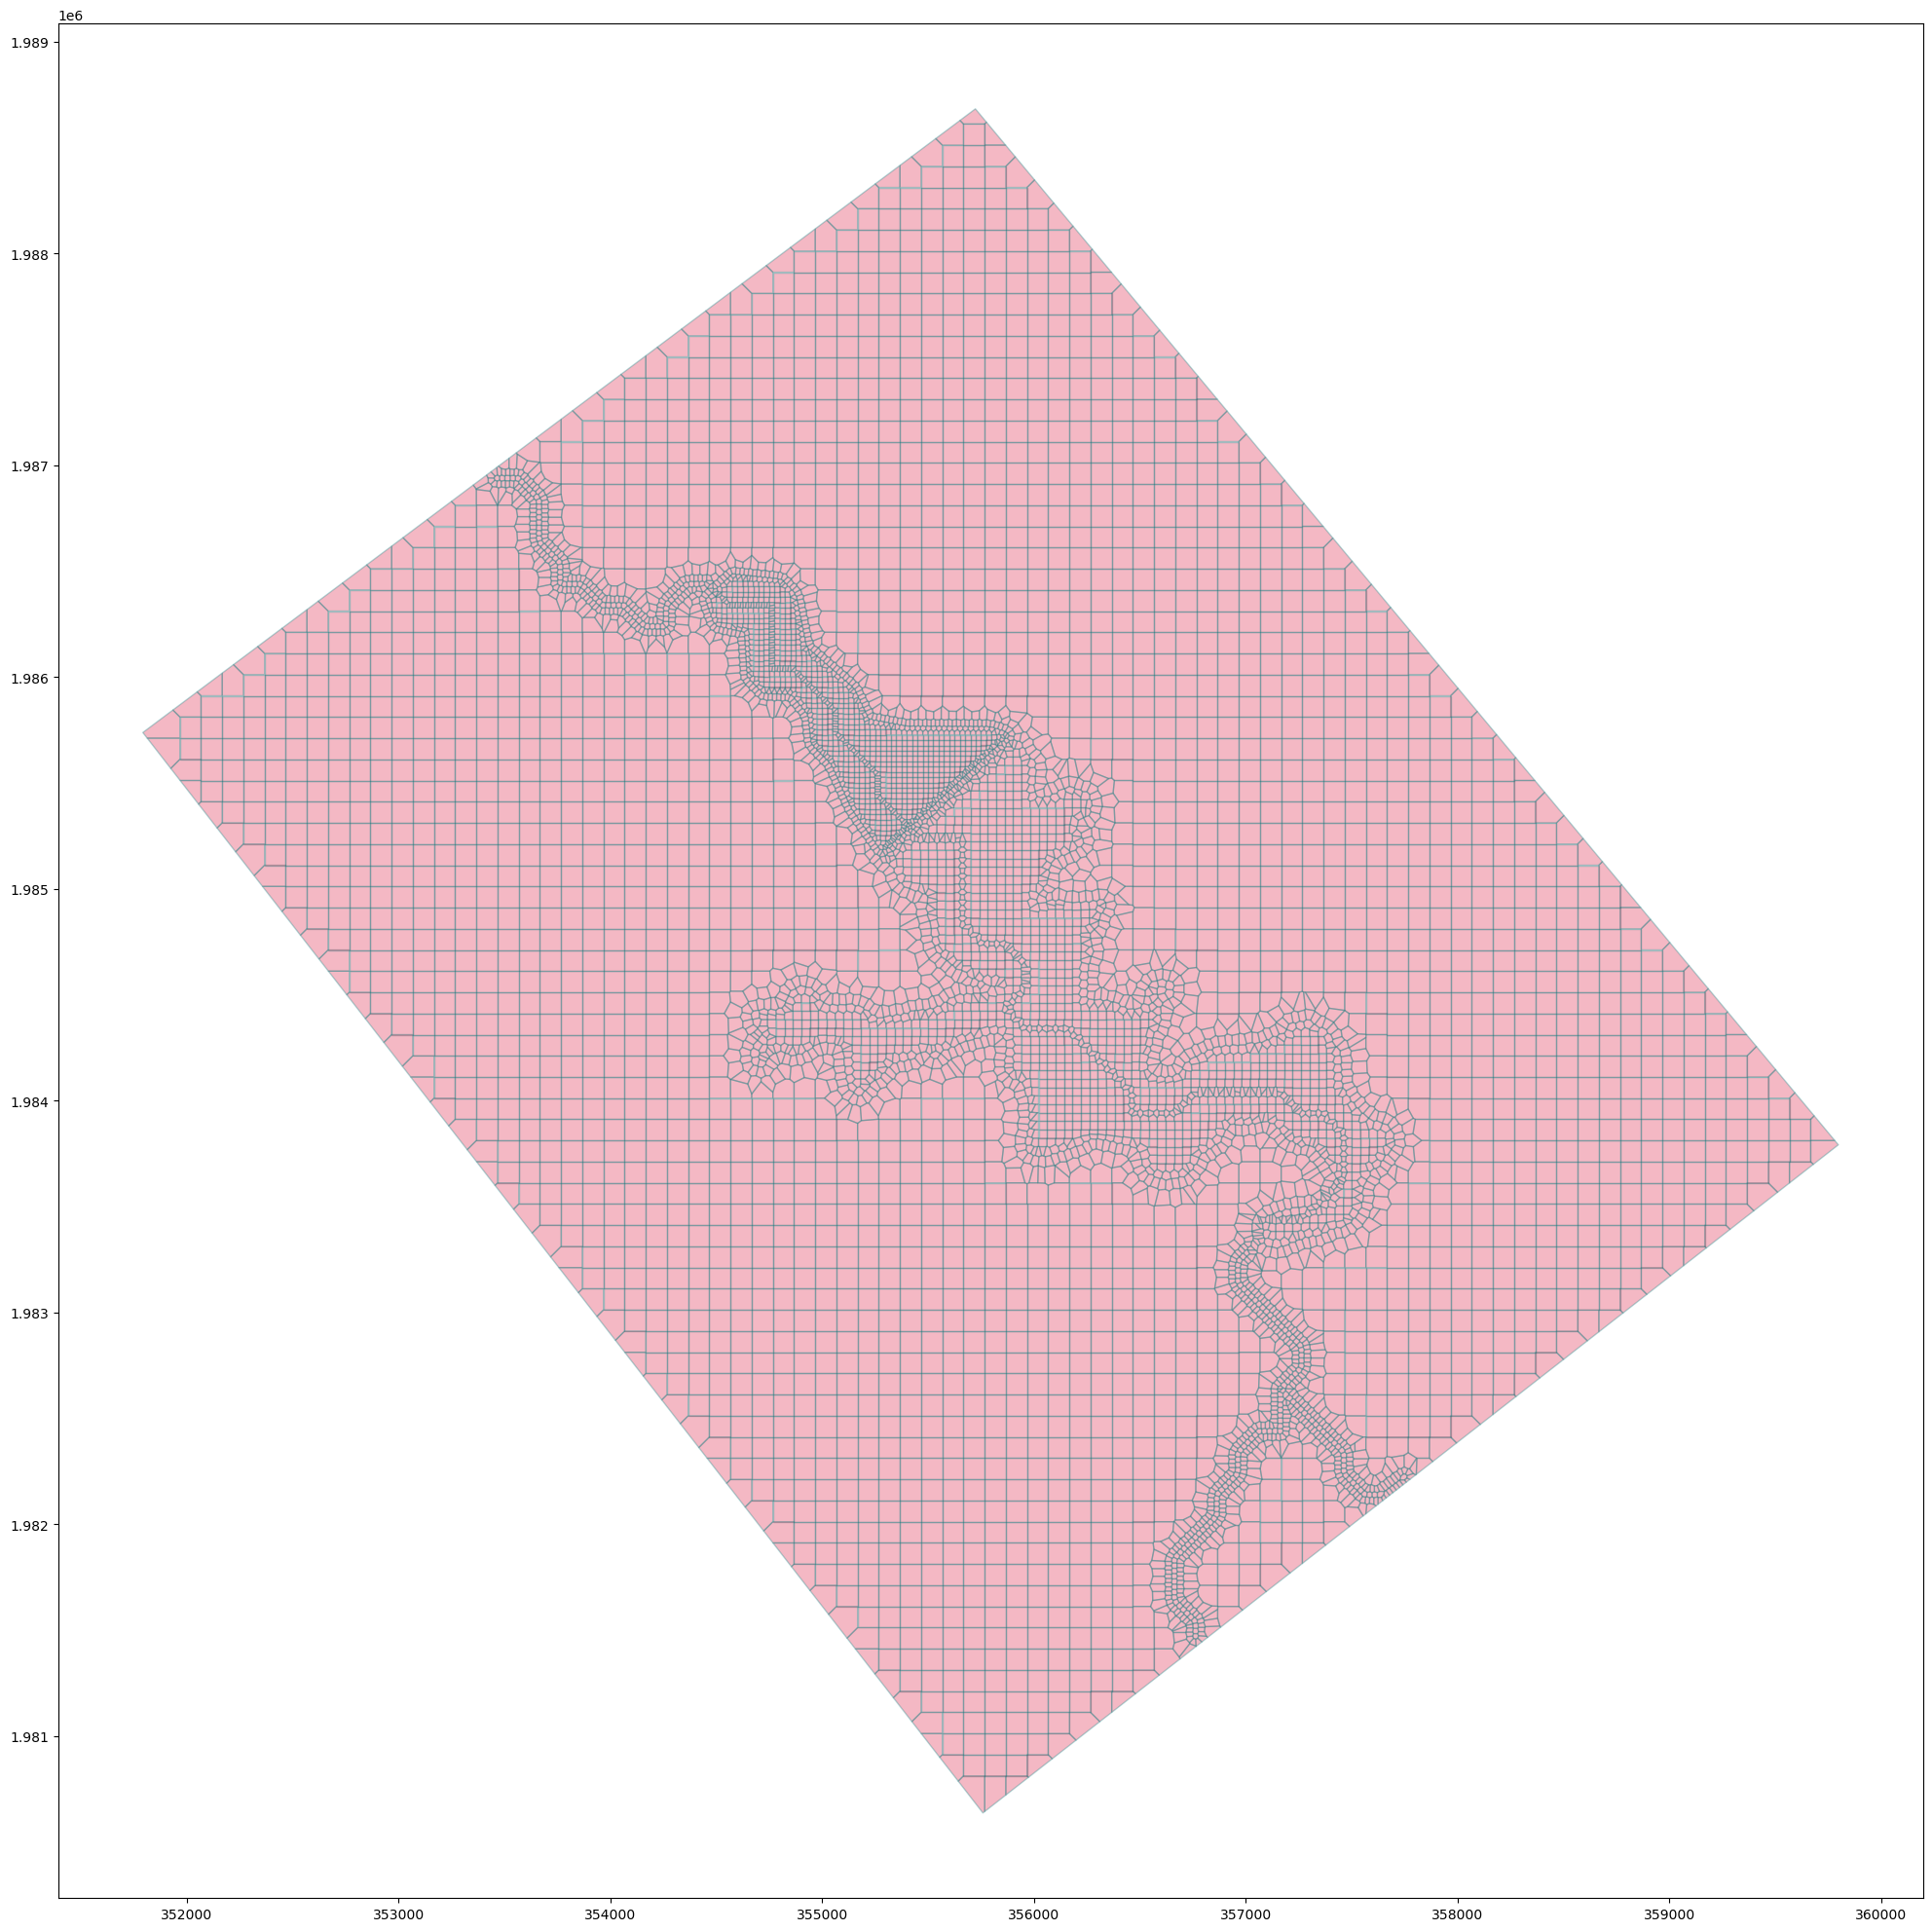

In [8]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file('../output/'+vorMesh.modelDis['meshName']+'.shp') ## <==== updated
#plot the mesh
mesh.plot(figsize=(35,25), fc='crimson', alpha=0.3, ec='teal') ## Org

## Part 2 generate disv properties

In [10]:
# open the mesh file
mesh=meshShape('../output/'+vorMesh.modelDis['meshName']+'.shp') ## <==== updated

In [11]:
# get the list of vertices and cell2d data
gridprops=mesh.get_gridprops_disv() ## Org


Creating a unique list of vertices [[x1,y1],[x2,y2],...]


100%|███████████████████████████████████████████████████████████████████████████| 7362/7362 [00:00<00:00, 13303.50it/s]



Extracting cell2d data and grid index


100%|████████████████████████████████████████████████████████████████████████████| 7362/7362 [00:03<00:00, 2027.65it/s]


In [12]:
#create folder
initiateOutputFolder('../json') ## <==== updated

#export disv
mesh.save_properties('../json/disvDict.json') ## <==== updated

The output folder ../json exists and has been cleared
